In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2021-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2021_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,북구,8900,북구,1475,19.87%,"8,163"
1,2021-01-07,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2021-01-07,갈치,60cm정도 500g 1마리(냉동),6000,북구,13800,북구,7800,130.0%,"9,900"
3,2021-01-07,고등어,30㎝정도 500g 1마리,4000,북구,4500,북구,500,12.5%,"4,250"
4,2021-01-07,달걀,오경슈퍼란60g정도 10개,2980,북구,3100,북구,120,4.03%,"3,040"
5,2021-01-07,닭고기,육계 1.0㎏,6580,북구,7950,북구,1370,20.82%,"7,265"
6,2021-01-07,대파,1.0㎏,3280,북구,4600,북구,1320,40.24%,"3,940"
7,2021-01-07,돼지고기,삼겹살 500g,9400,북구,9400,북구,0,0.0%,"9,400"
8,2021-01-07,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,5194,북구,3694,246.27%,"3,347"
9,2021-01-07,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2021-04-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2021_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-04-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",3712,북구,8900,북구,5188,139.76%,"6,306"
1,2021-04-08,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2021-04-08,갈치,60cm정도 500g 1마리(냉동),6500,북구,16333,북구,9833,151.28%,"11,417"
3,2021-04-08,달걀,오경슈퍼란60g정도 10개,3186,북구,3450,북구,264,8.29%,"3,318"
4,2021-04-08,닭고기,육계 1.0㎏,6980,북구,7500,북구,520,7.45%,"7,240"
5,2021-04-08,대파,1.0㎏,5980,북구,8550,북구,2570,42.98%,"7,265"
6,2021-04-08,돼지고기,삼겹살 500g,7900,북구,7900,북구,0,0.0%,"7,900"
7,2021-04-08,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,5194,북구,3694,246.27%,"3,347"
8,2021-04-08,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2021-04-08,맥주,하이트 500㎖ 1병,1440,북구,1460,북구,20,1.39%,"1,450"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2021-07-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2021_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-07-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,북구,8900,북구,1475,19.87%,"8,163"
1,2021-07-08,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2021-07-08,갈치,60cm정도 500g 1마리(냉동),6500,북구,12800,북구,6300,96.92%,"9,650"
3,2021-07-08,고등어,30㎝정도 500g 1마리,4125,북구,4500,북구,375,9.09%,"4,313"
4,2021-07-08,달걀,오경슈퍼란60g정도 10개,3750,북구,3980,북구,230,6.13%,"3,865"
5,2021-07-08,닭고기,육계 1.0㎏,6650,북구,8300,북구,1650,24.81%,"7,475"
6,2021-07-08,대파,1.0㎏,1700,북구,3393,북구,1693,99.59%,"2,547"
7,2021-07-08,돼지고기,삼겹살 500g,8900,북구,14900,북구,6000,67.42%,"11,900"
8,2021-07-08,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,5194,북구,3694,246.27%,"3,347"
9,2021-07-08,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2021-10-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2021_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-10-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5925,북구,8900,북구,2975,50.21%,"7,413"
1,2021-10-07,간장,오복왕표 0.9ℓ 1병,5720,북구,6980,북구,1260,22.03%,"6,350"
2,2021-10-07,갈치,60cm정도 500g 1마리(냉동),7000,북구,14142,북구,7142,102.03%,"10,571"
3,2021-10-07,고등어,30㎝정도 500g 1마리,4375,북구,4500,북구,125,2.86%,"4,438"
4,2021-10-07,달걀,오경슈퍼란60g정도 10개,3750,북구,3980,북구,230,6.13%,"3,865"
5,2021-10-07,닭고기,육계 1.0㎏,6900,북구,8300,북구,1400,20.29%,"7,600"
6,2021-10-07,대파,1.0㎏,2180,북구,3197,북구,1017,46.65%,"2,689"
7,2021-10-07,돼지고기,삼겹살 500g,14900,북구,15400,북구,500,3.36%,"15,150"
8,2021-10-07,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,5194,북구,3694,246.27%,"3,347"
9,2021-10-07,라면,신라면 120g 1봉지,736,북구,740,북구,4,0.54%,738


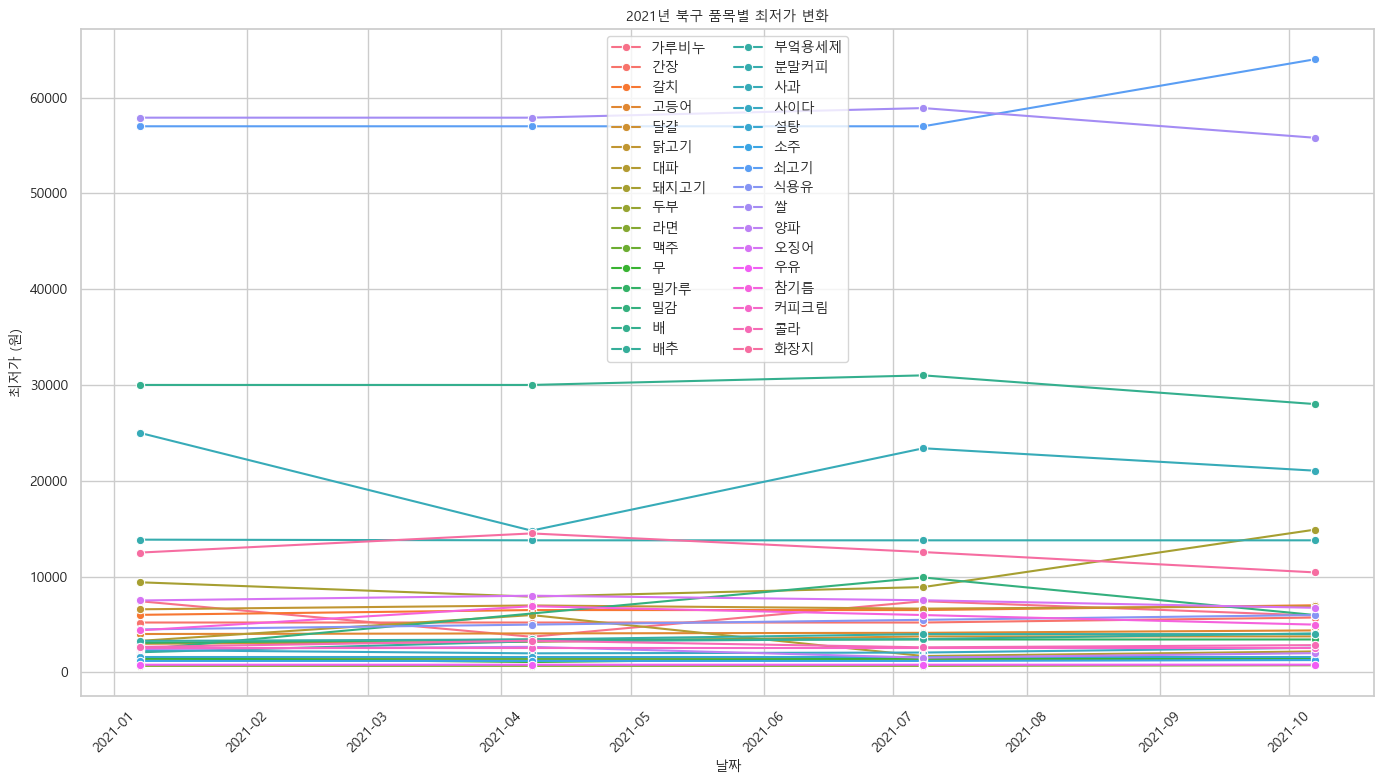

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2021_1q.csv")
q2 = pd.read_csv("북구2021_2q.csv")
q3 = pd.read_csv("북구2021_3q.csv")
q4 = pd.read_csv("북구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 북구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("북구2021_min.csv", index=False, encoding="utf-8-sig")

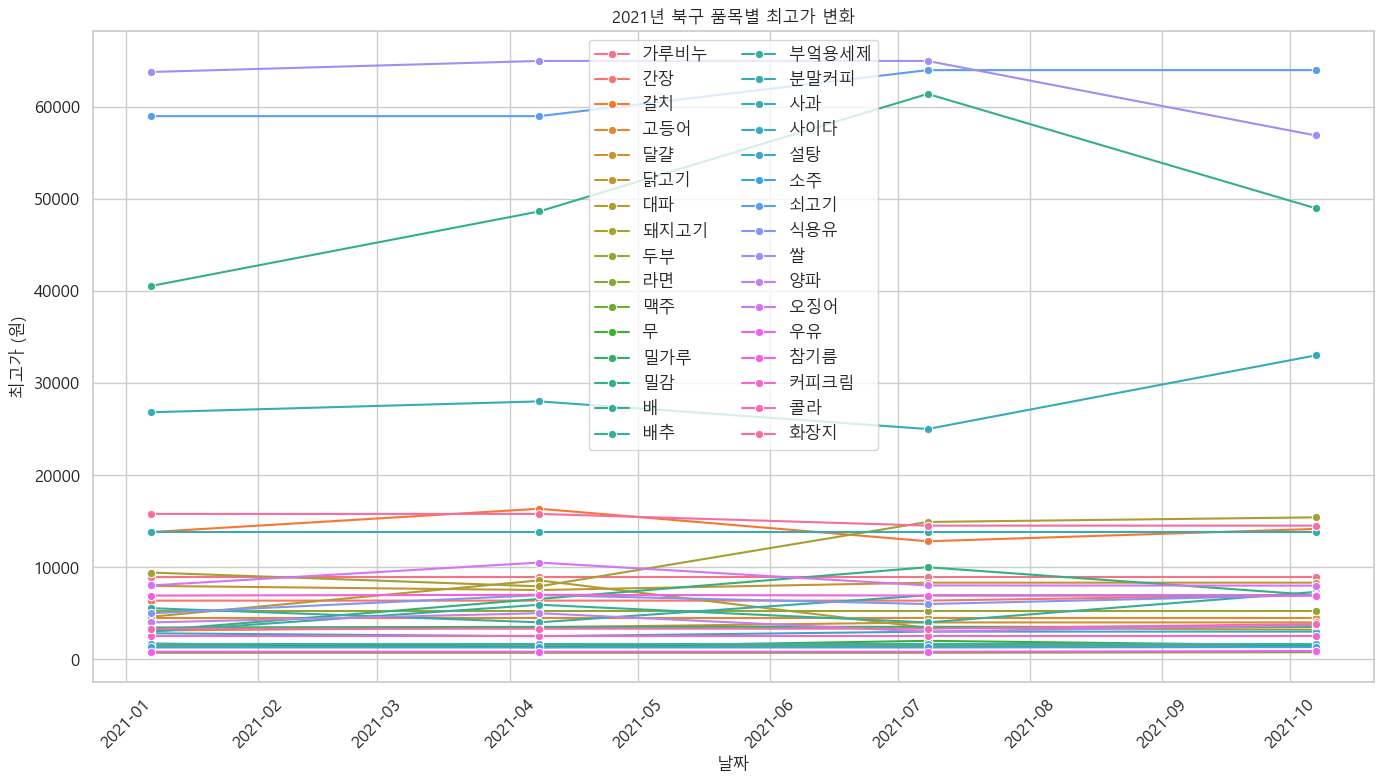

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2021_1q.csv")
q2 = pd.read_csv("북구2021_2q.csv")
q3 = pd.read_csv("북구2021_3q.csv")
q4 = pd.read_csv("북구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 북구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("북구2021_max.csv", index=False, encoding="utf-8-sig")